# BC205: Algorithms for Bioinformatics.
## II. Sequence Analysis
### Christoforos Nikolaou

## Sequence Analysis
* In this class we will start looking into real biological problems, focusing on sequence analysis
* We will discuss some very basic concepts of computation such as hashing
* We will then turn to the implementation of the things we learnt last time using Brute Force and Divide and Conquer Approaches
* We will discuss a new approach (Binary Search) and implement it the context of a Genome Analysis

## The biological problems:  
* Compare different species on the basis of DNA composition
* Find evidence of horizontal gene transfer in a bacterial genome
* Locate the Origin of Repication of a Bacterial Genome

## Bioinformatics Warm-Up
1. You are given a DNA sequence
    * Can you count the number of nucleotides of each of the four bases (A, G, C, T)?
    * How many calculations will you need?
    * How will you implement it?
2. Now consider the same problem only instead of nucleotides we need to count the number of all 8-nucleotides. What do you need to consider to attack the problem?


## Aspects of DNA Composition
* GC content
* genomic signatures
* parity distributions
* k-mer frequencies


## GC content
We call GC content (or GC%) the ratio of (G+C) nucleotides of a given DNA sequence
* Why is it important? G-C pairs are linked with 3 hydrogen bonds, while A-T ones with 2. High GC genomes are more stable in terms of physical chemistry.


## GC is related to:
* Biochemical level: Thermal stability
* Evolutionary level: Organism Phylogeny, Mutational pressures
* Genomic level: Genome size
* Functional level: Functional role of underlying sequences
* and many more

## GC content in Genomic Sequences
* Bacteria: GC% is highly variable **between** species
* Bacteria: GC% is rather homogeneous **within** each genome
* Bacteria: GC% can be used in their classification


## GC content in Genomic Sequences
* Eukaryotes: Very homogeneous overall GC% (~40-45% in all animals)
* Eukaryotes: Fluctuation of GC contentalong the chromosomes and organization in areas of (rather) stable GC%
* Eukaryotes: Regions of stable high/low GC content that segregate mammalian genomes in isochores


## Problem 1: GC content in Bacterial Genomes
* Given the DNA sequence of a Bacterial Genome, calculate its GC content:
    * Read the Sequence
    * Enumerate G
    * Enumerate C
    * Divide (G+C) over length of the sequence

## GCContent. Pseudocode
* Τhe idea is to **exhaustively** enumerate all mononucleotides, therefore our approach is a very basic Brute Force approach.
* Given that the content of the sequence is unknown we have no other choice.
* We will proceed by reading each nucleotide in the sequence and check its value. Then increment a variable each time we find a G or a C.

## GCContent: Implementation (naive)


In [4]:
# Naive GC content

import regex as re
f=open('files/ecoli.fa', 'r')

seq = ""
window=1000
total = 0
nG=nC=0
GCCont=0
times=0;
for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        total=total+length
        seq=seq+line[0:length-1]

for k in range(len(seq)):
    if(seq[k]=="G"):
        nG+=1
    elif(seq[k]=="C"):
        nC+=1
GCContent=(nG+nC)/len(seq)
print(GCContent)


0.5074167653333127


## GCContent: Implementation (using Python's count function)


In [5]:
import regex as re

f=open('files/staaur.fa', 'r')

seq = ""
window=1000
total = 0
nG=nC=0
GCCont=0
times=0;
for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        total=total+length
        seq=seq+line[0:length-1]
f.close()
nC=seq.count("C")
nG=seq.count("G")
GCCont=(nG+nC)/len(seq);
print(GCCont)

0.3291873726579277


## Hands on #1:
* Download a couple of bacterial genome sequences from ENSEMBL Bacteria (http://bacteria.ensembl.org/index.html)
* Implement GC content
* Report the results

* An example would be

Genome | GC |
------------ | -------------
a-Bac1 | 0.334
e-Bac2 | 0.595
e-Bac3 | 0.668
g-Bac4 | 0.409
e-Bac5 | 0.551
a-Bac6 | 0.352
a-Bac7 | 0.354
g-Bac8 | 0.418
g-Bac9 | 0.434
e-Bac8 | 0.627


## Problem 2: Variability of GC content _between_ Bacterial Genomes
* Given a number of bacterial genomes:  
    - Get their genome sequences  
    - Calculate the GC contents  
    - Calculate differences between the GC contents  
    - Rank genomes based on their differences  
* Pseudocode:
    * Perform GC_content on each of the genomes you downloaded  
    * Calculate D_(i,j)=|GC_i-GC_j| over all i,j  
    * Sort D_(i,j)

## Problem 2: Approach
* We could do this very easily with R but it can also be done otherwise

For example


In [1]:
f=open('files/GCContent.tsv', 'r')

i=0
GCC={}
for line in f:
    i=i+1
    if(i>1):
        species=line.split()[0]
        GC=line.split()[1]
        GCC[species]=float(GC)

gcdistances={}
for genome1 in GCC.keys():
    for genome2 in GCC.keys():
        pair=genome1+":"+genome2
        gcdistances[pair]=abs(float(GCC[genome1])-float(GCC[genome2]))
        gcdistances[pair]=round(gcdistances[pair],2)
        #print(pair, round(gcdistances[pair],3))

sorted(gcdistances.items(), key=lambda x: x[1])      


[('a-Bac1:a-Bac1', 0.0),
 ('e-Bac2:e-Bac2', 0.0),
 ('e-Bac3:e-Bac3', 0.0),
 ('g-Bac4:g-Bac4', 0.0),
 ('e-Bac5:e-Bac5', 0.0),
 ('a-Bac6:a-Bac6', 0.0),
 ('a-Bac6:a-Bac7', 0.0),
 ('a-Bac7:a-Bac6', 0.0),
 ('a-Bac7:a-Bac7', 0.0),
 ('g-Bac8:g-Bac8', 0.0),
 ('g-Bac9:g-Bac9', 0.0),
 ('e-Bac10:e-Bac10', 0.0),
 ('g-Bac4:g-Bac8', 0.01),
 ('g-Bac8:g-Bac4', 0.01),
 ('a-Bac1:a-Bac6', 0.02),
 ('a-Bac1:a-Bac7', 0.02),
 ('a-Bac6:a-Bac1', 0.02),
 ('a-Bac7:a-Bac1', 0.02),
 ('g-Bac8:g-Bac9', 0.02),
 ('g-Bac9:g-Bac8', 0.02),
 ('e-Bac2:e-Bac10', 0.03),
 ('g-Bac4:g-Bac9', 0.03),
 ('g-Bac9:g-Bac4', 0.03),
 ('e-Bac10:e-Bac2', 0.03),
 ('e-Bac3:e-Bac10', 0.04),
 ('e-Bac10:e-Bac3', 0.04),
 ('e-Bac2:e-Bac5', 0.05),
 ('g-Bac4:a-Bac7', 0.05),
 ('e-Bac5:e-Bac2', 0.05),
 ('a-Bac7:g-Bac4', 0.05),
 ('g-Bac4:a-Bac6', 0.06),
 ('a-Bac6:g-Bac4', 0.06),
 ('a-Bac7:g-Bac8', 0.06),
 ('g-Bac8:a-Bac7', 0.06),
 ('a-Bac1:g-Bac4', 0.07),
 ('e-Bac2:e-Bac3', 0.07),
 ('e-Bac3:e-Bac2', 0.07),
 ('g-Bac4:a-Bac1', 0.07),
 ('a-Bac6:g-Bac8',

* Notice how smaller values are obtained for same bacterial family (a-, g- and e-proteobacteria)

Let's now look how we can use this simple quantity to infer relationships between different genomes. 
In the following we make use of some python functions to organize the genomes in a tree structure that resembles the way evolutionary biologists try to infer phylogenetic relationships.

<ipython-input-2-c652b4de09d1>:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


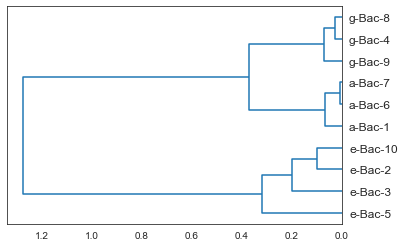

In [2]:
## Clustering of a dataset 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataframe and assign values/labels
df = pd.read_csv('files/GCContent_simple.csv')
dvalues = df['GCContent'].values.reshape(-1,1)
dlabels = list(df['Genome'])

# Calculate the distances
distances = pdist(dvalues)

# Convert the pairwise distances into a square distance matrix
distance_matrix = squareform(distances)

# Calculate the linkage matrix using Ward's method
linkage_matrix = linkage(distance_matrix, method='ward')

# Plot the dendrogram
sns.set_style('white')
dendrogram(linkage_matrix, labels=dlabels, color_threshold=0, orientation='left')

# Show the plot
plt.show()

See how alpha, gamma- and epsilon-proteobacteria form three distinct clades with the only input being their distances in the space of genomic GC%.


## Problem 3: What about different regions of the genome?
* We just saw how genomic GC% values may be used to draw conclusions for bacterial phylogeny
* But: How representative is the GC% value you calculated above?
* And: How efficiently can it be used to describe a genome?

## Problem 3: Why should we care?
* We mentioned that GC% is stable within bacterial genomes
* **But** Some areas of bacterial genomes are special
* Parts of the bacterial genome have been "horizontally" (as opposed to vertically, i.e. from their "mom") transferred from other species.


## Problem 3: Stability of GC content _along_ Bacterial Genomes
* Regions of "strange", or "deviating" GC% values in a given genome are red flags of HGT. The problem now is:
    * Given a bacterial genome sequence:  
    * Locate regions of the genome where horizontal gene transfer may have occurred.

## Problem 3: Approach
* Choose a window to scan your sequence. This will be your resolution
* Calculate GC per window
* Try to locate GC values that deviate from the genome average

## Problem 3: The core
* We basically repeat the approach for GC content but now we calculate one value for each window


In [9]:
import regex as re
f=open('files/Staaur.fa', 'r')

seq = ""
window=1000
nG=nC=0
GCCont=[]
total=0

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        total=total+length
        seq=seq+line[0:length-1]
f.close()

step=100
times=int(len(seq)/step);

for i in range(times):
    DNA=seq[i*step:i*step+window]
    nC=DNA.count("C")
    nG=DNA.count("G")
    GCCont.append((nG+nC)/window)

for k, value in enumerate(GCCont[1:10]):
    print(k*step, "\t", value)


0 	 0.321
100 	 0.322
200 	 0.322
300 	 0.311
400 	 0.315
500 	 0.317
600 	 0.312
700 	 0.313
800 	 0.313


## Hands-on #2:
* Get the genome sequence of St. aureus
* Implement Sliding GC
* Locate positions in the genome with extreme values of GC
* The problem is: *What do we mean by "extreme values"?** How do we define "extreme"?


## Problem 3: Statistics Interlude
* Given a set/sample of values, how can we decide on whether a value could be part of that sample or not?
* In our problem: We know that the GC% of bacteria tends to be characteristic of the genome. Can we "spot" regions of the genome that bear GC% values that are _different_ from that characteristic value?
* Q1: How will we define that characteristic value?
* Q2: How will we quantify the _difference_ as big enough or not?

## Problem 3: Theoretical basis (simplified)
* Central Limit Theorem (simplified):     
    * Regardless of the underlying distribution, the mean of a large number of samples follow the normal distribution.  
    * We can thus model GC values per window based on the normal distribution

## Problem 3: The statistics
* We will model the "characteristic value" as the mean of GC values for all windows
* We will also calculate the standard deviation of these values to assess the variance
* We will then apply...

## Z-transformation
* Given a value x, we can compare x to a normal distribution with mean=m and standard deviation=std with the z-score:
    Z(x)= (x - m)/std  
    Z(x) is thus the difference of x from m in units of standard deviation.  
    Knowing that in a normal distribution ~99.5% of the values fall within +/-3*std a value of Z(x)>3 or Z(x)<-3 makes it highly unlikely that x is part of our distribution.

## Problem 3. Predicting HGT locations
* We can now combine sliding GC content calculations with a Z-score transformation and a filtering for |Z|>=3



In [16]:
import regex as re
import numpy as np

f=open('files/Staaur.fa', 'r')

seq = ""
window=1000
nG=nC=0
GCCont=[]

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

step=100
times=int(len(seq)/step);

for i in range(times):
    DNA=seq[i*step:i*step+window]
    nC=DNA.count("C")
    nG=DNA.count("G")
    GCCont.append((nG+nC)/window)

# Calculate Z-scores
mGC=np.mean(GCCont)
sdGC=np.std(GCCont)
zGC=(GCCont-mGC)/sdGC
for i in range(len(zGC)):
    if abs(zGC[i])>=3:
        print(i*step, zGC[i])


2764699
311700 3.3056871660938962
311800 3.510729542254593
311900 3.7450636864382467
312000 3.80364722248416
312100 3.6571883823693767
312200 3.422854238185723
446200 -3.138501798956574
446300 -3.109210030933617
610000 3.0713530219102427
610100 4.125856670736683
610200 4.272315510851466
610300 4.77027556724173
610400 5.121776783517211
610500 5.180360319563124
610600 6.000529824205912
610700 6.088405128274782
610800 6.146988664320696
610900 5.883362752114085
611000 5.561153303861561
611100 5.443986231769735
611200 5.736903911999302
611300 5.414694463746778
611400 5.268235623631994
611500 5.180360319563124
611600 4.975317943402427
611700 4.887442639333557
611800 4.740983799218774
611900 4.77027556724173
612000 4.77027556724173
612100 4.740983799218774
612200 4.213731974805553
612300 4.184440206782596
612400 4.096564902713726
612500 4.037981366667814
612600 3.62789661434642
612700 3.1006447899331993
613200 3.0127694858643292
613300 3.129936557956156
613400 3.2763953980709397
613500 3.5693

## Problem 2: Revisited

* Background DNA composition has some **functional** role besides simply reflecting mutational pressures
* This means that in some cases we need to know why the local composition is guided by _other_ aspects of molecular evolutio. E.g. why would rRNA genes be G+C-rich even in AT-rich genomes?
* We need to find a way to control for _background nucleotide composition_

## Problem 2 Revisited: Distinguishing between genomes through their sequence composition
1. Going beyond the GC content
2. Going beyond simple bases (mononucleotides, k=1)
3. Analyzing all dinucleotide frequencies of k=2

* Pseudocode:
    * For each kmer in _4^k_ k-mers
    * Calculate N(kmer)
    * Create a table

## Problem: How to count k-mer frequencies
* For mononucleotides we did it with a Brute Force approach. However the mononucleotides are 4. The k-mers are 4^k.
* How can we count the frequencies of k-mers?
  1. Do we need **all** k-mers?
  2. Do we need to check each k-mer at every step?
* How many calculations do we need if we answer "yes" to 1,2 above.


## Solution: Hashing Strategy instead of Brute Force
* Read the sequence in chunks of _k_ nucleotides
* For each subsequence increment a dictionary value with the subsequence as key

## Problem 2 Revisited: K-mer frequencies


In [7]:
import regex as re

f=open('files/Staaur.fa', 'r')

seq = ""
k=2
kmers={}

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

for i in range(len(seq)-k):
    DNA=seq[i:i+k]
    if DNA not in kmers.keys():
        kmers[DNA]=1
    else:
        kmers[DNA]+=1

{k: float(v) / len(seq) for k, v in kmers.items()}


{'GT': 0.052417641124766205,
 'TA': 0.09542485456825499,
 'AT': 0.11214421533772755,
 'TT': 0.12211817633673684,
 'AC': 0.0527258121046812,
 'CT': 0.04827324782914885,
 'TC': 0.05299347234545244,
 'CA': 0.06572144020018092,
 'AA': 0.12267628410904767,
 'CG': 0.02563642552046353,
 'TG': 0.06441677737793518,
 'GG': 0.02547908470325341,
 'CC': 0.025711298047273862,
 'AG': 0.04831231175618033,
 'GA': 0.05203640613318122,
 'GC': 0.033911829099659674}

## Problem 2 Revisited: A table of _4^k_ frequencies of occurrence  
Base | A | T | G | C
------------- | ------------- | ------------- | ------------- | -------------
A | 0.090 | 0.112 | 0.048 | 0.053
T | 0.095 | 0.090 | 0.064 | 0.053
G | 0.052 | 0.052 | 0.023 | 0.034
C | 0.066 | 0.048 | 0.026 | 0.023

* Values may be seen as "probabilities" of finding each k-mer in the sequence
* Can we use the notion of the probability to modify the table so that we get rid of the background nucleotide composition?

## Problem 2 Revisited: Removing Background Composition
* The problem stated above persists at the level of k-mers: The background DNA composition may affect our results
* At the k-mer level we can remove the background using ratios of observed/expected frequencies
* Which is the expected frequency of a given k-mer?

## Problem 2 Revisited: Observed/Expected(o/e) k-mer frequencies
* Mathematics Interlude:
    * Assume two events A, B that are linked with each other
    * We then say that A and B are dependent (or conditioned) and we have a "conditional probability" of A happening given B is also happening
    * We can think of k-mers the same way: a k-mer is more probable to occur if its constituent mono-mers are occurring
    * Bottomline: Any given k-mer's frequency of occurrence is dependent on the frequencies of occurrence of its mononucleotides. Thus:

Given a k-mer of length k the o/e-ratio frequency is defined as:  
  $$R[N_1N_2..N_k]=F[N_1N_2..N_k]/(F[N_1]F[N_2]..F[N_k])$$

In this way we can define a new table of modified frequencies that is independent of mono-nucleotide composition

## Problem 2 Revisited: Observed/Expected K-mer frequencies


In [8]:
import regex as re

f=open('files/Staaur.fa', 'r')

seq = ""
k=2
kmers={}

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

pnuc={}
for i in range(len(seq)):
    nuc=seq[i]
    if nuc not in pnuc.keys():
        pnuc[nuc]=1
    else:
        pnuc[nuc]+=1

pnuc={k: float(v) / len(seq) for k, v in pnuc.items()}

for i in range(len(seq)-k):
    DNA=seq[i:i+k]
    if DNA not in kmers.keys():
        kmers[DNA]=1
    else:
        kmers[DNA]+=1

kmers={k: float(v) / len(seq) for k, v in kmers.items()}

rkmers=kmers
for kmer in kmers.keys():
    nuc1=list(kmer)[0]
    nuc2=list(kmer)[1]
    rkmers[kmer]=round(kmers[kmer]/(pnuc[nuc1]*pnuc[nuc2]),3)

print(rkmers)


{'GT': 0.955, 'TA': 0.848, 'AT': 0.997, 'TT': 1.088, 'AC': 0.949, 'CT': 0.872, 'TC': 0.957, 'CA': 1.183, 'AA': 1.088, 'CG': 0.946, 'TG': 1.174, 'GG': 0.949, 'CC': 0.94, 'AG': 0.878, 'GA': 0.946, 'GC': 1.252}


## Problem 2 Revisited: A table of o/e 4^k frequencies of occurrence  
Base | A | G | C | T
------------- | ------------- | ------------- | ------------- | -------------
A | 0.800 | 0.997 | 0.878 | 0.949
G | 0.848 | 0.799 | 1.174 | 0.957
C | 0.946 | 0.955 | 0.848 | 1.252
T | 1.183 | 0.872 | 0.946 | 0.841

* Notice how values now go >1. What does this mean?
* How is this table better (or not) than the previous one?

## Genomic Signatures: Comparing o/e k-mer composition
* Genomic Signatures are defined as the table of o/e k-mers for a given genome
* We can use these tables to analyze distances between genomes. (Hint: even eukaryote genomes!)


## Hands-on #3:
* Get chromosome 1 from (human, mouse, fly, worm, yeast)
* Use a genomic signature approach to cluster genomic signatures from different genomes
* Calculate the distance between rho_xy(p) and rho_xy(s) to create a table of distances.

## Problem 4: Finding the DNA Replication in a bacterial genome
* Bacterial Genomes replicated their genome starting at one point and proceeding towards the opposite point in  the circular genome from both directions.
* Bacterial genomes also have a particular distribution of nucleotides along their genome
* The difference of A-T (and G-C) complementary nucleotides goes through a sort of "phase transition" that splits the genome approximately in half.
* Do you know what this split is?
* Do you know why it is so?


## How is this related to Sequence Analysis?
* Due to the pioneering work of E. Chargaff we know that A~T and G~C in **single-stranded DNA**
* We know that this holds for all complete genomes except very few exceptions
* The exceptions are the few genomes that **do not** replicate symmetrically
* DNA-strand parity:
    * Strand X is replicated in-continuously
    * Accumulates more substitutions
    * If substitutions are biased the strand will guide the change in both strands through base-pairing


## Approaching the problem
* We thus expect (and observe) the parity to be violated and that this violation occurs symmetrically on either side of the OriC
* We are looking for a way to locate this _phase transition_ in the parity violation
* We thus need:
    * A measure of the parity
    * A way to monitor this measure along the genome
    * A way to locate abrupt changes in its values

## Breaking the problem into pieces
1. Analyze the DNA composition _along_ the genome
2. Calculate a quantity that will be informative
3. Create a condition that will test the location of the Ori

* Pseudocode: Given a bacterial genome:
    * Count nucleotides in windows of N base pairs
    * Calculate the scaled AT-skew as (A-T)/(A+T)
    * Create an array of the skew values along the genome
    * Locate the transition point

## Problem 4: Parity Measure Implementation


In [9]:
f=open('files/Staaur.fa', 'r')

seq = ""

for line in f:
    x=re.match(">", line)
    if x == None:
        length=len(line)
        seq=seq+line[0:length-1]
f.close()

window=1000
step=100
times=int(len(seq)/step)

for i in range(times):
	DNA=seq[i*step:i*step+window]
	A=DNA.count("A")
	T=DNA.count("T")
	C=DNA.count("C")
	G=DNA.count("G")
	print(i*step,"\t",i*step+window,"\t",float(A-T)/(A+T))

0 	 2716200 	 -0.016058394160583942
2715300 	 2716300 	 -0.03074670571010249
2715400 	 2716400 	 -0.03468208092485549
2715500 	 2716500 	 -0.04885057471264368
2715600 	 2716600 	 -0.04775687409551375
2715700 	 2716700 	 -0.043227665706051875
2715800 	 2716800 	 -0.035868005738880916
2715900 	 2716900 	 -0.04885057471264368
2716000 	 2717000 	 -0.047619047619047616
2716100 	 2717100 	 -0.021645021645021644
2716200 	 2717200 	 -0.013024602026049204
2716300 	 2717300 	 -0.02170767004341534
2716400 	 2717400 	 -0.023529411764705882
2716500 	 2717500 	 -0.008928571428571428
2716600 	 2717600 	 -0.008928571428571428
2716700 	 2717700 	 -0.013657056145675266
2716800 	 2717800 	 -0.01984732824427481
2716900 	 2717900 	 0.006191950464396285
2717000 	 2718000 	 -0.020030816640986132
2717100 	 2718100 	 -0.05443234836702955
2717200 	 2718200 	 -0.059748427672955975
2717300 	 2718300 	 -0.05750798722044728
2717400 	 2718400 	 -0.0784
2717500 	 2718500 	 -0.10112359550561797
2717600 	 2718600 	 -0.

## Problem 4: Plotting the Values

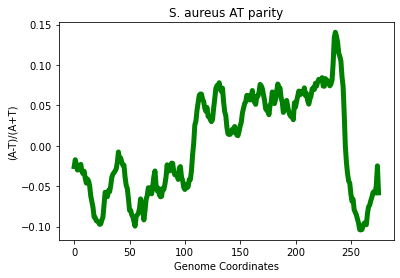

In [10]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import regex as re  

f = open('files/Staaur.fa', 'r')
seq = ""
total = 0
A=T=G=C=[]
times=0;
for line in f:
	x=re.match(">", line)
	if x == None:
		length=len(line)
		total=total+length
		seq=seq+line[0:length-1]
f.close()

x=[]
ATparity=[]
window=100000
step=10000
times=int(len(seq)/step);
for i in range(times):
    x.append(i)
    DNA=seq[i*step:i*step+window]
    A=DNA.count("A")
    T=DNA.count("T")
    C=DNA.count("C")
    G=DNA.count("G")
    ATparity.append(float(A-T)/float(A+T))


# plotting points as a scatter plot
plt.plot(x, ATparity, color= "green", linewidth=5.0)
#plt.scatter(x, ATparity, color= "green")

# x-axis label
plt.xlabel('Genome Coordinates')
# frequency label
plt.ylabel('(A-T)/(A+T)')
# plot title
plt.title('S. aureus AT parity')
# showing legend
#plt.legend()

# function to show the plot
plt.show()


## Problem 4: Locating the breakpoint(s)
* Not a simple problem. In fact one (breakpoint detection) for which research is ongoing in many fields
* Things you could try:
    * Using derivation (checking the difference between each value and the previous one)
    * Density-based approaches: Trying to locate the region around which changes in the sign occur more robustly (i.e. given many different points around it)

## Concept. Binary Searches    
* Let's think of a simpler problem first:
Suppose you are given a quadratic equation: f(x)=ax**2+bx+c and you are asked to locate a root of the equation in an interval [k,m].
* How would you proceed?
* A fast and efficient way is to start by checking the values f(k) and f(m). If their product in f(k)f(m)<0 this means that the function "crosses" the x-axis at some point between k and m. How then can we locate that point?
* The answer is given by iterative splits of [k,m] in intervals that are always have the size of m-k. (That is [i=k, j=(k+m)/2] or [i=(k+m)/2, j=m]) and checking if the condition of f(i)f(j)<0 holds. If it does, we choose that interval and repeat.
* Question 1: What do we need to consider before starting?
* Question 2: How do we stop?

## Exercises: To think about
* Use a genomic signature approach to locate possible HGT genes in the genome of _St. aureus_. Do your results of "outliers" differ from those obtained with the GC content approach?
* Write a program to locate the origin of replication for a given bacterial genome using the parity rules described in the lecture.
* The approach of the Genomic Signatures for k=2 works rather well because the k-mers are 16 but what about larger numbers of k (k=7 or more)? Would you use the same approach?
